# RECOGNITION OF OBJECTS 
## Data Base : CIFAR10
## Name : Srajan Chourasia
### Import The Required  Libraries 

In [1]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Load the dataset from keras

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 

In [3]:
# print information of training dataset
print(f"Training Dataset x : {x_train.shape}")
print(f"Training Dataset y : {y_train.shape}")

Training Dataset x : (50000, 32, 32, 3)
Training Dataset y : (50000, 1)


In [4]:
# print information of testing dataset
print(f"Testing Dataset x : {x_test.shape}")
print(f"Testing Dataset y : {y_test.shape}")

Testing Dataset x : (10000, 32, 32, 3)
Testing Dataset y : (10000, 1)


## Display Some sample images

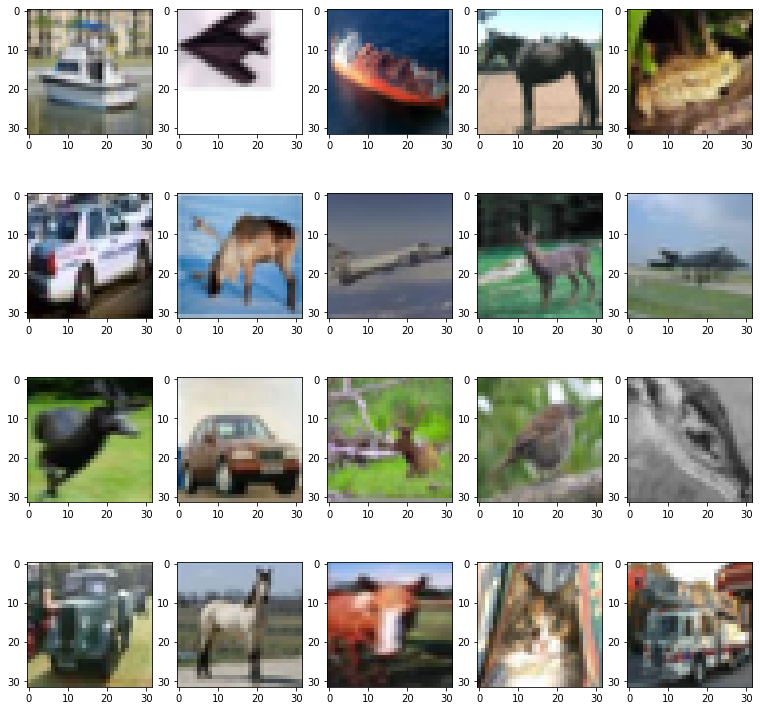

In [5]:
plt.figure(figsize = (13,13))
for i in range(1,21):
    plt.subplot(4,5,i)
    img = x_train[500 + i**2]
    plt.imshow(img)
plt.show()

## PreProcessing of the data

In [6]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

## One Hot Encoding

In [7]:
print(f"Shape of Training set y before one hot encoding : {y_train.shape}")
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(f"Shape of Training set y before one hot encoding : {y_train.shape}")

Shape of Training set y before one hot encoding : (50000, 1)
Shape of Training set y before one hot encoding : (50000, 10)


## Import the model and layers from keras

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

## Building The Model

In [9]:
model = Sequential()

# Convolutional Layers
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (32,32,3)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(100, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Hidden Layers
model.add(Dense(750, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(10, activation = 'softmax'))

## Compile The Model

In [10]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

## Training The Model

In [11]:
model.fit(x_train, y_train, batch_size = 125, epochs = 25, validation_data = (x_test,y_test))

Epoch 1/25
400/400 [==============================] - 195s 482ms/step - loss: 1.6035 - accuracy: 0.4087 - val_loss: 1.2079 - val_accuracy: 0.5690
Epoch 2/25
400/400 [==============================] - 223s 558ms/step - loss: 1.0919 - accuracy: 0.6113 - val_loss: 0.9219 - val_accuracy: 0.6780
Epoch 3/25
400/400 [==============================] - 193s 482ms/step - loss: 0.8919 - accuracy: 0.6872 - val_loss: 0.7966 - val_accuracy: 0.7217
Epoch 4/25
400/400 [==============================] - 187s 469ms/step - loss: 0.7603 - accuracy: 0.7359 - val_loss: 0.7627 - val_accuracy: 0.7382
Epoch 5/25
400/400 [==============================] - 184s 459ms/step - loss: 0.6625 - accuracy: 0.7708 - val_loss: 0.7063 - val_accuracy: 0.7547
Epoch 6/25
400/400 [==============================] - 183s 457ms/step - loss: 0.5849 - accuracy: 0.7948 - val_loss: 0.6914 - val_accuracy: 0.7625
Epoch 7/25
400/400 [==============================] - 183s 458ms/step - loss: 0.5078 - accuracy: 0.8223 - val_loss: 0.6862 -

## Predicting The Data

In [12]:
# Index 
classes = range(10)

# Lables Name
lables = ['airplane','automobile','bird','cat','dear','dog','frog','hourse','ship','truck']

# Zip the index and there corresponding lable name to make a dictionary
class_lable = dict(zip(classes, lables))

# Generate a sample batch of 16 images to predict
sample = x_test[1000:1016]
sample_lables = np.argmax(y_test[1000:1016], axis = -1)

## Make Prediction

In [13]:
prediction = model.predict(sample)

predicted_class = np.argmax(prediction, axis = -1)
print(predicted_class)

[5 0 8 4 8 1 1 8 9 7 0 8 6 1 5 4]


## Final Object Detection

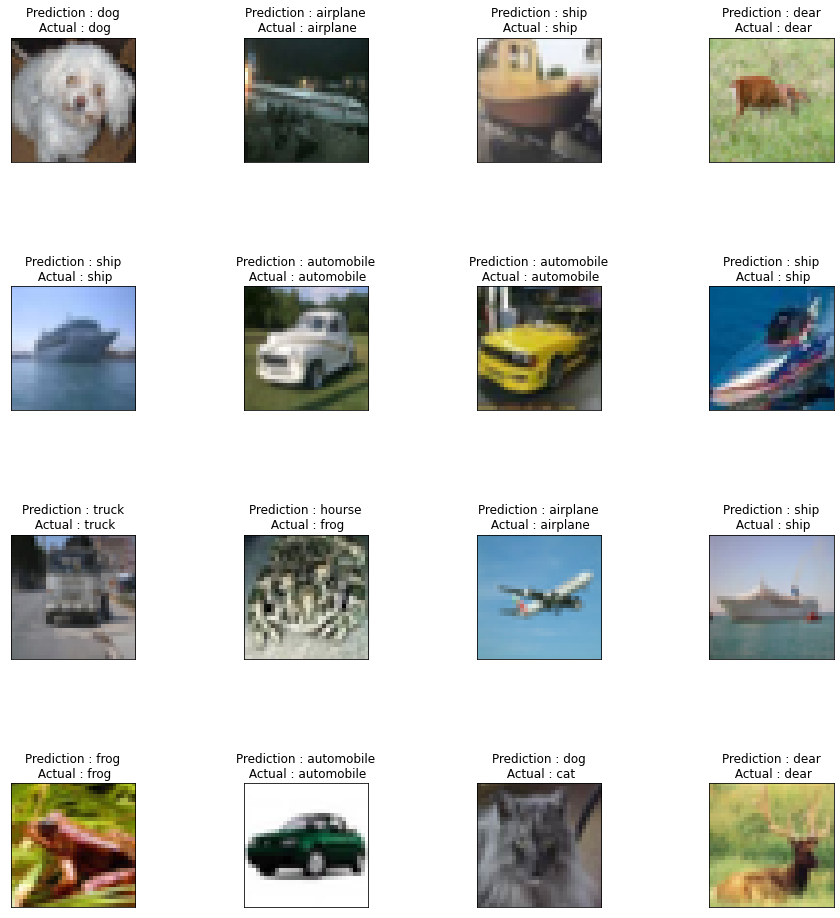

In [14]:
fig, axs = plt.subplots(4, 4, figsize = (16,16))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, image in enumerate(sample) :
    for key, value in class_lable.items():
        if predicted_class[i] == key:
            title = f"Prediction : {class_lable[key]}\n Actual : {class_lable[sample_lables[i]]}"
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # Plot the image
    axs[i].imshow(image)
    
# Show the plot
plt.show()